## 2. We will now derive the probability that a given observation is part of a bootstrap sample. Suppose that we obtain a bootstrap sample from a set of n observations.

In [101]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize)

In [102]:
from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.discriminant_analysis import \
     (LinearDiscriminantAnalysis as LDA,
      QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [103]:
n = 100

(a) What is the probability that the first bootstrap observation is
not the jth observation from the original sample? Justify your
answer.

In [104]:
First_boo_obs_noj = 1 - 1/n

(b) What is the probability that the second bootstrap observation
is not the jth observation from the original sample?

In [105]:
Sec_boo_obs_noj = 1 - 1/n

(c) Argue that the probability that the jth observation is not in the
bootstrap sample is (1 − 1/n)n.

In [106]:
'All_boo_obs_noj = First_boo_obs_noj * Sec_boo_obs_noj * …………'
# All_boo_obs_noj = (1 - 1/n)**n
All_boo_obs_noj = lambda n :  (1 - 1/n)**n 
# All_boo_obs_noj
All_boo_obs_noj(n)

0.3660323412732292

这里# All_boo_obs_noj = (1 - 1/n)**n 犯了十分经典的错误，详细请看CS61A 


(d) When n = 5, what is the probability that the jth observation is
in the bootstrap sample?

In [107]:
n = 5
templ = ('n ={0:d}, the probability that the jth observation in the bootstrap sample {1:.1%}')

print(templ.format(n,All_boo_obs_noj(n)))

n =5, the probability that the jth observation in the bootstrap sample 32.8%


(e) When n = 100, what is the probability that the jth observation
is in the bootstrap sample?

In [108]:
n = 100
print(templ.format(n,All_boo_obs_noj(n))),print((1-1/n)**n)

n =100, the probability that the jth observation in the bootstrap sample 36.6%
0.3660323412732292


(None, None)

(f) When n = 10, 000, what is the probability that the jth observation
is in the bootstrap sample?

In [109]:
n = 10000
print(templ.format(n,All_boo_obs_noj(n))),print((1-1/n)**n)

n =10000, the probability that the jth observation in the bootstrap sample 36.8%
0.36786104643297046


(None, None)

In [110]:
n = 100000000
print(templ.format(n,All_boo_obs_noj(n))),print((1-1/n)**n)

n =100000000, the probability that the jth observation in the bootstrap sample 36.8%
0.3678794374835396


(None, None)

(g) Create a plot that displays, for each integer value of n from 1
to 100, 000, the probability that the jth observation is in the
bootstrap sample. Comment on what you observe.

In [111]:
def Plot_the_Probability():
    y_arr = []
    x_arr = []
    for i in range(2,1000001):
        n = i
        x_arr.append(n)
        m = 1 - All_boo_obs_noj(n)
        y_arr.append(m)
    fig,ax = subplots(figsize=[10,10])
    ax.plot(x_arr,y_arr,'o')


In [112]:
def PlotPower(seq):
    y_arr = []
    # y_arr = lambda x: i**a for i in seq
    for i in seq:
        m = 1 - All_boo_obs_noj(i)
        y_arr.append(m)
    fig,ax = subplots(figsize=[10,10])
    ax.plot(seq,y_arr)

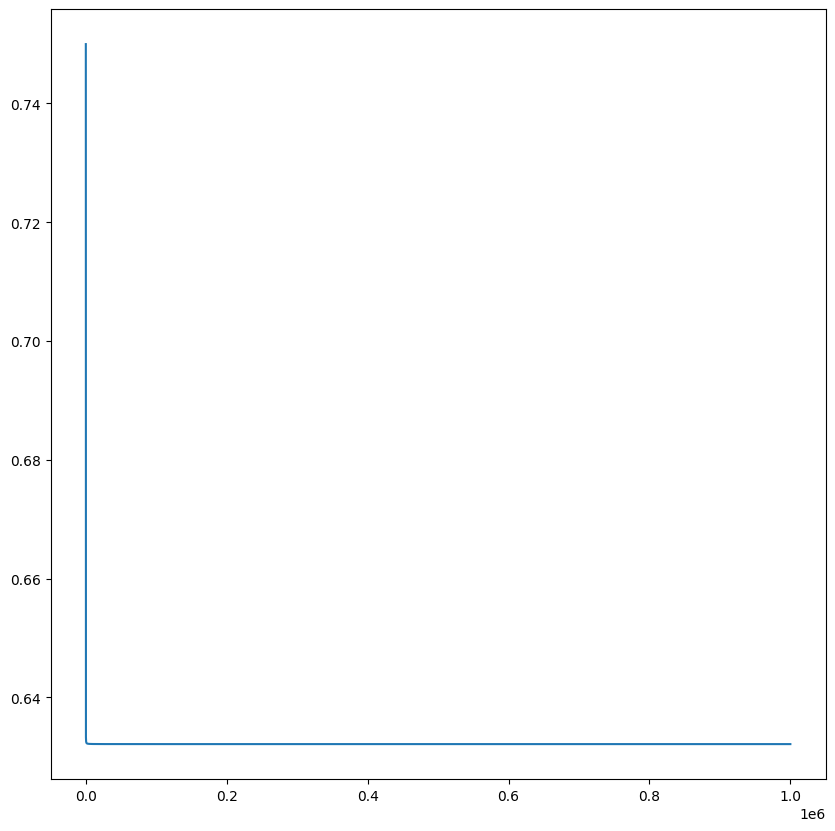

In [113]:
# Plot_the_Probability()
x = []
for i in range(2,1000001):
    x.append(i)
PlotPower(x)
# y_arr[:10]

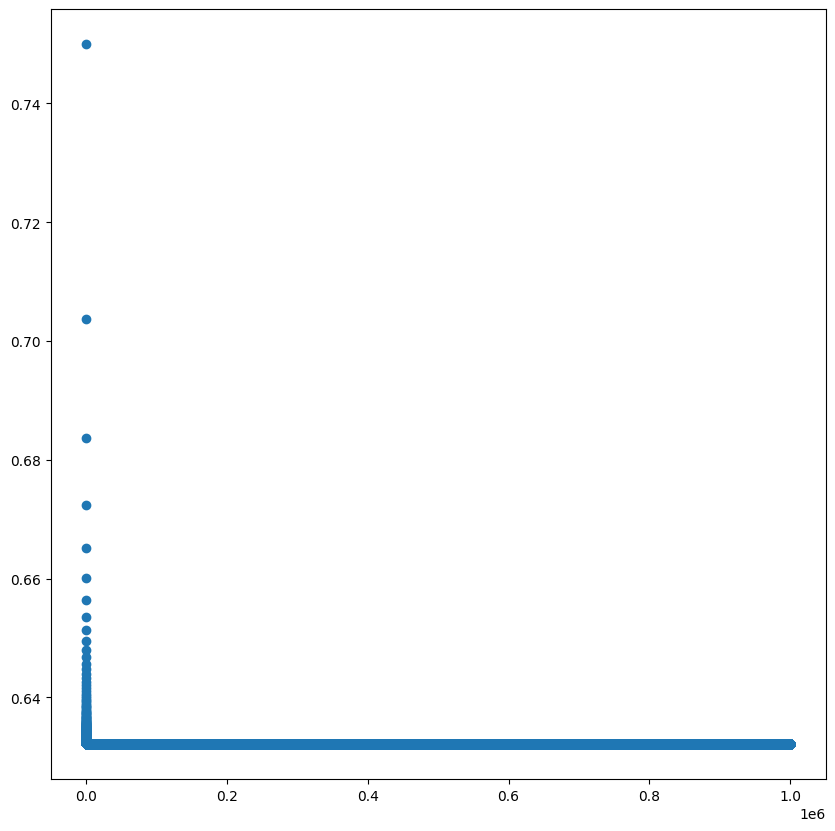

In [114]:
Plot_the_Probability()

这里看了一眼答案，我写的函数是正确的，但是我却在质疑自己的结果（因为这个图像太特别了），还有一个重要的原因是其实在写完函数后，我都没有自己去用极限来验证最后的结果，还是太依赖计算机了。

(h) We will now investigate numerically the probability that a bootstrap
sample of size n = 100 contains the jth observation. Here
j = 4. We first create an array store with values that will subsequently
be overwritten using the function np.empty(). We then
repeatedly create bootstrap samples, and each time we record
whether or not the fifth observation is contained in the bootstrap
sample.

In [115]:
np.empty?
a = np.empty(10)
a

array([0.001 , 0.002 , 0.0025, 0.005 , 0.01  , 0.02  , 0.025 , 0.05  ,
       0.1   , 0.2   ])

Docstring:
empty(shape, dtype=float, order='C', *, like=None)

Return a new array of given shape and type, without initializing entries.

Parameters
----------
shape : int or tuple of int
    Shape of the empty array, e.g., ``(2, 3)`` or ``2``.
dtype : data-type, optional
    Desired output data-type for the array, e.g, `numpy.int8`. Default is
    `numpy.float64`.
order : {'C', 'F'}, optional, default: 'C'
    Whether to store multi-dimensional data in row-major
    (C-style) or column-major (Fortran-style) order in
    memory.
like : array_like, optional
    Reference object to allow the creation of arrays which are not
    NumPy arrays. If an array-like passed in as ``like`` supports
    the ``__array_function__`` protocol, the result will be defined
    by it. In this case, it ensures the creation of an array object
    compatible with that passed in via this argument.

    .. versionadded:: 1.20.0

Returns
-------
out : ndarray
    Array of uninitialized (arbitrary) data of the gi

In [116]:
rng = np.random.default_rng (10)
store = np.empty (10000)
for i in range (10000):
    store[i] = np.sum(rng.choice(100, replace=True) == 4) > 0
np.mean(store)

0.0089

In [117]:
print(np.sum(rng.choice(100, replace=True) == 4))
rng.choice?

0


Docstring:
choice(a, size=None, replace=True, p=None, axis=0, shuffle=True)

Generates a random sample from a given array

Parameters
----------
a : {array_like, int}
    If an ndarray, a random sample is generated from its elements.
    If an int, the random sample is generated from np.arange(a).
size : {int, tuple[int]}, optional
    Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
    ``m * n * k`` samples are drawn from the 1-d `a`. If `a` has more
    than one dimension, the `size` shape will be inserted into the
    `axis` dimension, so the output ``ndim`` will be ``a.ndim - 1 +
    len(size)``. Default is None, in which case a single value is
    returned.
replace : bool, optional
    Whether the sample is with or without replacement. Default is True,
    meaning that a value of ``a`` can be selected multiple times.
p : 1-D array_like, optional
    The probabilities associated with each entry in a.
    If not given, the sample assumes a uniform distribution over a

BING AI:rng.choice(100, replace=True) 从一个从0到99的整数数组中随机选择一个数。replace=True 表示选择是有放回的，即同一个数字可以被多次选择2。

MY ANSWER:

3. We now review k-fold cross-validation.

(a) Explain how k-fold cross-validation is implemented.

(b) What are the advantages and disadvantages of k-fold crossvalidation
relative to:
i. The validation set approach?
ii. LOOCV?

4. Suppose that we use some statistical learning method to make a prediction
for the response Y for a particular value of the predictor X.
Carefully describe how we might estimate the standard deviation of
our prediction.